In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# 시각화 한글 지원
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf" 
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 상관계수
from scipy import stats
import random
# model
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
import xgboost
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPRegressor

# 1. 데이터 전처리

# 2. 모델링

In [13]:
df = pd.read_csv('C:/Users/sja95/OneDrive/바탕 화면/dataset/건강검진2017.csv', encoding = 'euc-KR')

df = df[['성별코드','연령대코드(5세단위)','신장(5Cm단위)','체중(5Kg단위)','허리둘레','흡연상태','음주여부','수축기혈압']]
df.columns = ['sex','age','ht','wt','waist','smoking','alcohol','sbp']

df = df.dropna(axis = 0)

df['bmi'] = df['wt'] / ((df['ht']/100)**2)
df['absi'] = (df['waist']*0.393701) /((df['bmi']**0.6666) * ((df['ht']/100)**0.5))
df = df.round(decimals = 2)

df.loc[(df.alcohol=='Y'),'alcohol'] = 1.0
df.loc[(df.alcohol=='N'), 'alcohol'] = 0.0

df['alcohol'] = df.alcohol.astype(float)

df.drop(df.loc[(df['waist']>128.9)|(df['waist']<55.0)].index, inplace = True)
df.drop(df.loc[(df['absi']>3.94)|(df['absi']<2.12)].index, inplace = True)



In [14]:
df.loc[(df.sbp>140),'sbp']

3         145.0
5         142.0
8         145.0
37        167.0
42        142.0
          ...  
999962    143.0
999967    144.0
999968    151.0
999973    143.0
999974    143.0
Name: sbp, Length: 82602, dtype: float64

## 1) Linear Regression

In [14]:
X_test.loc[[703231]]
y_test.loc[703231]

100.0

In [5]:
i = random.randint(0,len(X_test))

print(i)

x = X_test.loc[i]
print(x)

y = y_test.loc[i]

print(y)

256138
sex          2.00
age         11.00
ht         155.00
wt          50.00
bmi         20.81
absi         2.93
waist       70.00
smoking      1.00
alcohol      0.00
Name: 256138, dtype: float64
115.0


In [7]:
y_hat[256138]

116.07422761393718

In [11]:
age = 11
sex = 2
ht = 155
wt = 50
bmi = 20.81
absi = 2.93
waist = 70.0
smoking = 1.0
alcohol = 0.0


X_test = pd.DataFrame([[sex, age, ht, wt, bmi, absi, waist, smoking, alcohol]],
                     columns = ['sex','age','ht','wt','bmi','absi','waist','smoking','alcohol'])

y_tmp = lgb.predict(X_test)
y_tmp[0]

116.07422761393718

In [3]:
## 1. split

X = df[['sex','age','ht','wt','bmi','absi','waist','smoking','alcohol']]
y = df['sbp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2045)

## 2. fit 

RA = LinearRegression()
RA.fit(X_train, y_train)

## 3. Predict

y_hat = RA.predict(X_test)

## 4. Root MSE 

rmse_LR = np.sqrt(mean_squared_error(y_test, y_hat))

print('rmse : ', rmse_LR)

rmse :  13.180674484424266


## 2) Polynomial Linear Regression_2차

In [5]:
## 2. polynomialFeatures(degree=2)

poly_train = PolynomialFeatures(degree=2).fit_transform(X_train)


## 3. Linear Regression 

PLR = LinearRegression()
PLR.fit(poly_train, y_train)

## 4. Predict

poly_test = PolynomialFeatures(degree=2).fit_transform(X_test)
y_hat = PLR.predict(poly_test)

## 5. RMSE

rmse_PLR2 = np.sqrt(mean_squared_error(y_test, y_hat))

print('rmse : ', rmse_PLR2) 

rmse :  13.102767150411148


## 3) Polynomial Linear Regression_3차

In [6]:
## 2. polynomialFeatures(degree=3)

poly_train = PolynomialFeatures(degree=3).fit_transform(X_train)


## 3. Linear Regression 

PLR3 = LinearRegression()
PLR3.fit(poly_train, y_train)

## 4. Predict

poly_test = PolynomialFeatures(degree=3).fit_transform(X_test)
y_hat = PLR3.predict(poly_test)

## 5. RMSE

rmse_PLR3 = np.sqrt(mean_squared_error(y_test, y_hat))

print('rmse : ', rmse_PLR3)  

rmse :  13.084525158120368


## 4) Ridge Regression

In [7]:
## 2. model define

ridge = Ridge(alpha = 0.05)
ridge.fit(X_train, y_train)
y_hat = ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_hat))

print('rmse : ', rmse_ridge)  

rmse :  13.180674679138038


## 5) Lasso Regression

In [8]:
## 2. model define
    
lasso = Lasso(alpha = 0.05)
lasso.fit(X_train, y_train)
y_hat = lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_hat))

print('rmse : ', rmse_lasso) 

rmse :  13.193374423098232


## 6) ElasticNet Regression 

In [9]:
elastic = ElasticNet(alpha = 0.05, l1_ratio=0.7)
elastic.fit(X_train, y_train)
y_hat = elastic.predict(X_test)
rmse_elasticNet = np.sqrt(mean_squared_error(y_test, y_hat))

print('rmse : ', rmse_elasticNet) 

rmse :  13.19419901720702


## 7) Decision Tree

In [10]:
## 2. fit 

dt = DecisionTreeRegressor(random_state = 2045, max_depth = 8  ,min_samples_split = 128)
dt.fit(X_train, y_train)

## 3. Predict

y_hat = dt.predict(X_test)

## 4. Root MSE 

rmse_dt = np.sqrt(mean_squared_error(y_test, y_hat))

print('rmse : ', rmse_dt)


rmse :  13.131415582763735


## 8) RandomForest

In [11]:
%%time

## 2. fit 

rf = RandomForestRegressor(random_state = 2045, max_depth = 10  ,max_features = 4, n_jobs = -1, n_estimators = 100)
rf.fit(X_train, y_train)

## 3. Predict

y_hat = rf.predict(X_test)

## 4. Root MSE 

rmse_rf = np.sqrt(mean_squared_error(y_test, y_hat))

print('rmse : ', rmse_rf)


rmse :  13.09376838506824
Wall time: 15.8 s


## 9) GradientBoosting Regression

In [12]:
%%time

## 2. fit 

gb = GradientBoostingRegressor(random_state = 2045, n_estimators = 1000, learning_rate = 0.03)
gb.fit(X_train, y_train)

## 3. Predict

y_hat = gb.predict(X_test)

## 4. Root MSE 

rmse_GBM = np.sqrt(mean_squared_error(y_test, y_hat))

print('rmse : ', rmse_GBM)


rmse :  13.08281016519785
Wall time: 12min 7s


## 10) XGBoost_gbtree

In [13]:
%%time

## 2. fit 

xgb = XGBRegressor(random_state = 2045, 
                    n_estimators = 1000, 
                    learning_rate = 0.01,
                   max_depth = 10)
xgb.fit(X_train, y_train)

## 3. Predict

y_hat = xgb.predict(X_test)

## 4. Root MSE 

rmse_XGBtree = np.sqrt(mean_squared_error(y_test, y_hat))

print('rmse : ', rmse_XGBtree)


rmse :  13.09854121495063
Wall time: 4min 14s


## 11) XGBoost_gblinear

In [14]:
%%time

## 2. fit 

xgb = XGBRegressor(random_state = 2045,
                   booster = 'gblinear',
                    n_estimators = 2000, 
                    learning_rate = 0.2)
xgb.fit(X_train, y_train)

## 3. Predict

y_hat = xgb.predict(X_test)

## 4. Root MSE 

rmse_XGBlinear = np.sqrt(mean_squared_error(y_test, y_hat))

print('rmse : ', rmse_XGBlinear)



rmse :  13.219197810681612
Wall time: 47.8 s


## 12) LGBM Regression 

In [4]:
%%time

## 2. fit 

lgb = LGBMRegressor(random_state = 2045,
                    n_estimators = 2000, 
                    learning_rate = 0.01,
                  max_depth = 12)
lgb.fit(X_train, y_train)

## 3. Predict

y_hat = lgb.predict(X_test)

## 4. Root MSE 

rmse_LGBM = np.sqrt(mean_squared_error(y_test, y_hat))

print('rmse : ', rmse_LGBM)


rmse :  13.07986710916365
Wall time: 24.4 s


In [9]:
y_hat[y_hat > 140]

array([143.72075586, 140.95826664, 140.36416522, 142.24705137,
       140.07468499, 141.043961  , 141.56522848, 141.65871989,
       141.54713981, 140.92121186, 145.0865354 , 140.59350518,
       142.7221963 , 140.07121515, 141.67231778, 145.38581798,
       140.70931903, 141.65165517, 145.85232552, 143.74238588,
       140.42440152, 140.65267271, 145.17934691, 144.93003942,
       140.70816297, 140.14145107, 140.76616331, 144.22489239,
       147.07076063, 143.17825748, 144.22489239, 140.13905233,
       140.88453583, 140.10631012, 141.33899376, 141.92150942,
       140.26508668, 144.72098537, 141.70122066, 145.54577651,
       141.14878363, 141.33425269, 140.92129938, 140.85612674])

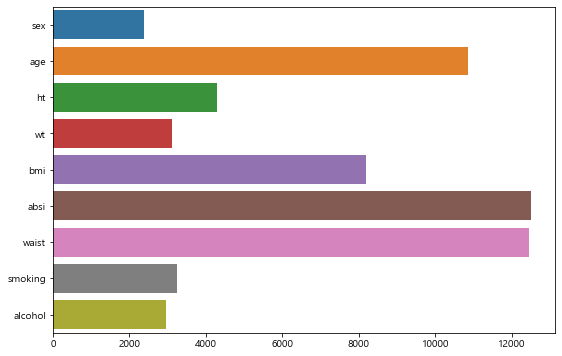

In [5]:
plt.figure(figsize = (9,6))
sns.barplot(lgb.feature_importances_,
           X_train.columns)
plt.savefig('featureImportance_sbp.png')
plt.show()

In [13]:
y_tmp = lgb.predict(X_test.loc[[703231]])
y_tmp

array([127.51318211])

In [10]:
pickle.dump(lgb, open('LGBM.sav','wb'))

## 13) MLP Regression 

In [18]:
%%time 

## 2. model define & fit

mlp = MLPRegressor(hidden_layer_sizes = (128,128,64), activation = 'relu', random_state = 2045,
                  max_iter = 2000)
mlp.fit(X_train, y_train)

## 3. predicition

y_hat = mlp.predict(X_test)

## 4. RMSE, R2 score

rmse_MLP2 = np.sqrt(mean_squared_error(y_test, y_hat))

print('rmse : ', rmse_MLP2)

rmse :  13.094073504982909
Wall time: 20min 29s


# 3. 모델 Selection

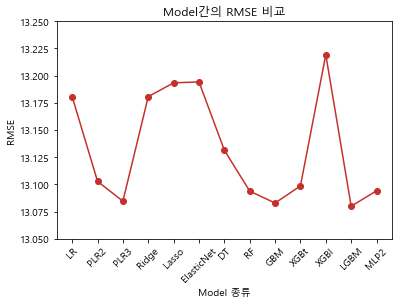

In [19]:
name = ['LR','PLR2','PLR3','Ridge','Lasso','ElasticNet','DT','RF','GBM','XGBt','XGBl','LGBM','MLP2']
rmses = [rmse_LR, rmse_PLR2, rmse_PLR3, rmse_ridge, rmse_lasso, rmse_elasticNet, 
        rmse_dt, rmse_rf, rmse_GBM, rmse_XGBtree, rmse_XGBlinear, rmse_LGBM, rmse_MLP2 ]


plt.figsize = (20, 8)
plt.plot(name, rmses, marker = 'o' , color = '#C4302B')
plt.ylim(13.05,13.25)
plt.xticks(rotation = 45)
plt.xlabel('Model 종류')
plt.ylabel('RMSE')
plt.title('Model간의 RMSE 비교')
plt.savefig('rmse_Models.png')
plt.show()